<a href="https://colab.research.google.com/github/Ashtamprajapati/Anemia-sense-Leveraging-Machine-learning-for-precise-anemia-Recognitions/blob/main/Anemea_Disease_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [25]:
df=pd.read_csv('anemia.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [27]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [28]:
df.shape

(1421, 6)

In [29]:
#checking for null values

In [30]:
df.isnull().sum()

,0
Gender,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
Result,0


In [31]:
# 0-not anemic $ 1 -anemic
# checking for the anemia and not anemia

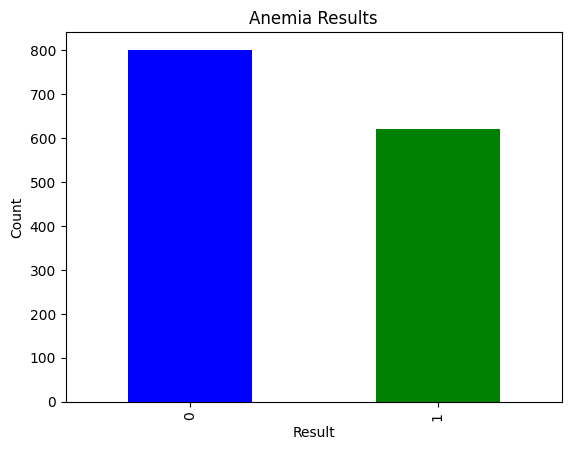

In [32]:
results=df['Result'].value_counts()
results.plot(kind='bar',color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Anemia Results')
plt.show()

In [33]:
# we can see that female count is more than the male so,
# we can balance it using undersampling

In [34]:
from sklearn.utils import resample
majorclass=df[df['Result']==0]
minorclass=df[df['Result']==1]

major_downnsamp=resample(majorclass,replace=False,n_samples=len(minorclass),random_state=42)
df=pd.concat([major_downnsamp, minorclass])
print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


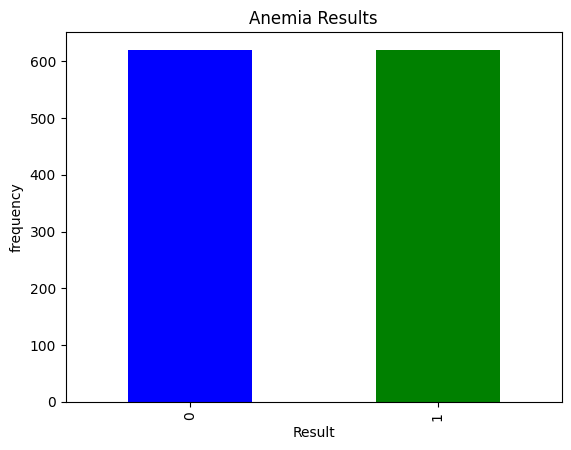

In [35]:
#plot the balanced gender counts
results=df['Result'].value_counts()
results.plot(kind='bar',color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('frequency')
plt.title('Anemia Results')
plt.show()

In [36]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.540323,13.218145,22.903952,30.277984,85.620968,0.500000
std,0.498573,1.976190,3.993624,1.394515,9.673794,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.400000,85.300000,0.500000
75%,1.000000,14.900000,26.200000,31.500000,94.225000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


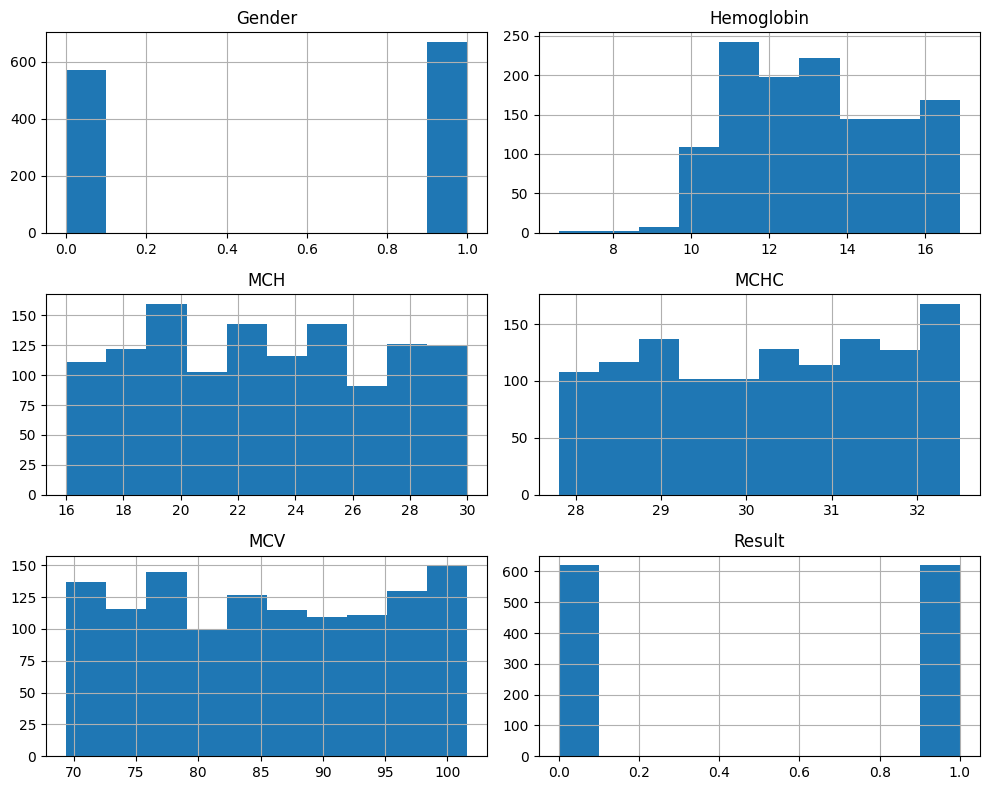

In [37]:
# Visualize the distribution of numerical features using histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

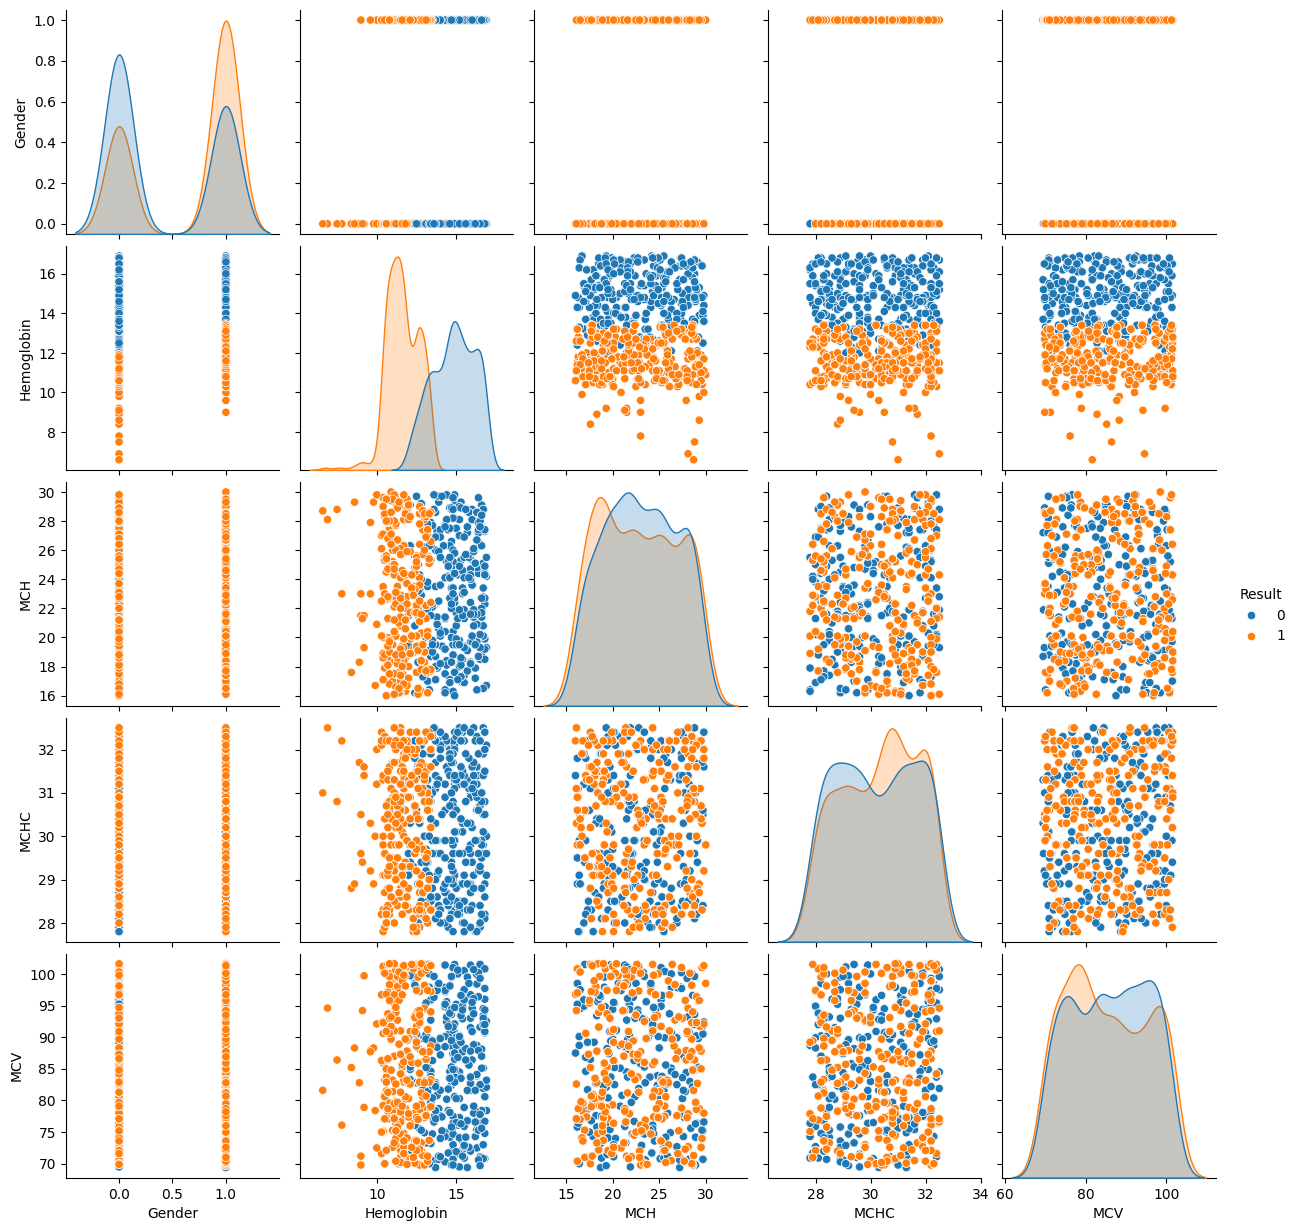

In [38]:
# Visualize relationships between features, colored by 'Result'
import seaborn as sns
sns.pairplot(df, hue='Result', diag_kind='kde')
plt.show()

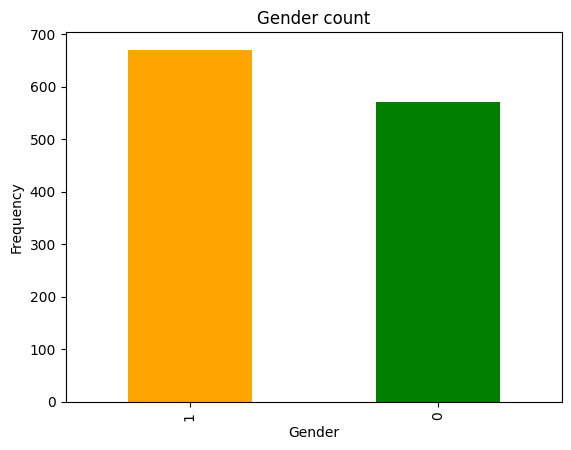

In [39]:
output = df['Gender'].value_counts()
output.plot(kind = 'bar', color=['orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender count')
plt.show()

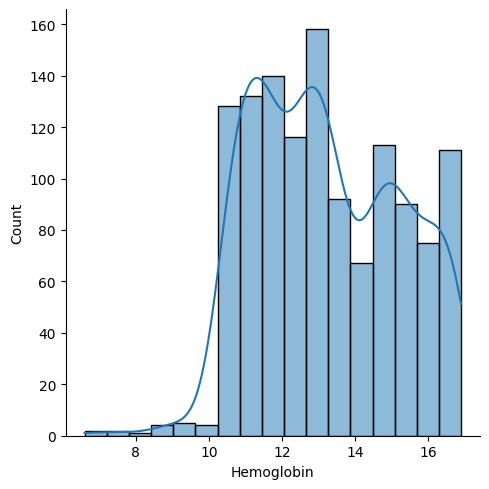

In [42]:
sns.displot(df['Hemoglobin'], kde=True)
plt.show()

/tmp/ipython-input-796045712.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y= df['Hemoglobin'], x = df ['Gender'], hue = df[ 'Result'], ci=None)


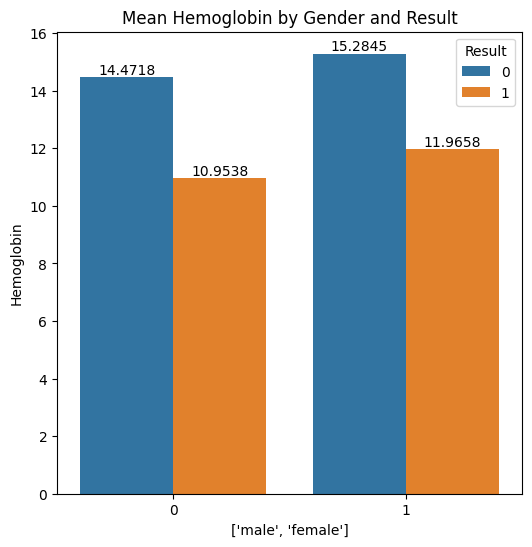

In [44]:
plt.figure(figsize=(6,6))
ax = sns.barplot(y= df['Hemoglobin'], x = df ['Gender'], hue = df[ 'Result'], ci=None)
ax.set(xlabel=['male', 'female'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Mean Hemoglobin by Gender and Result")
plt.show()

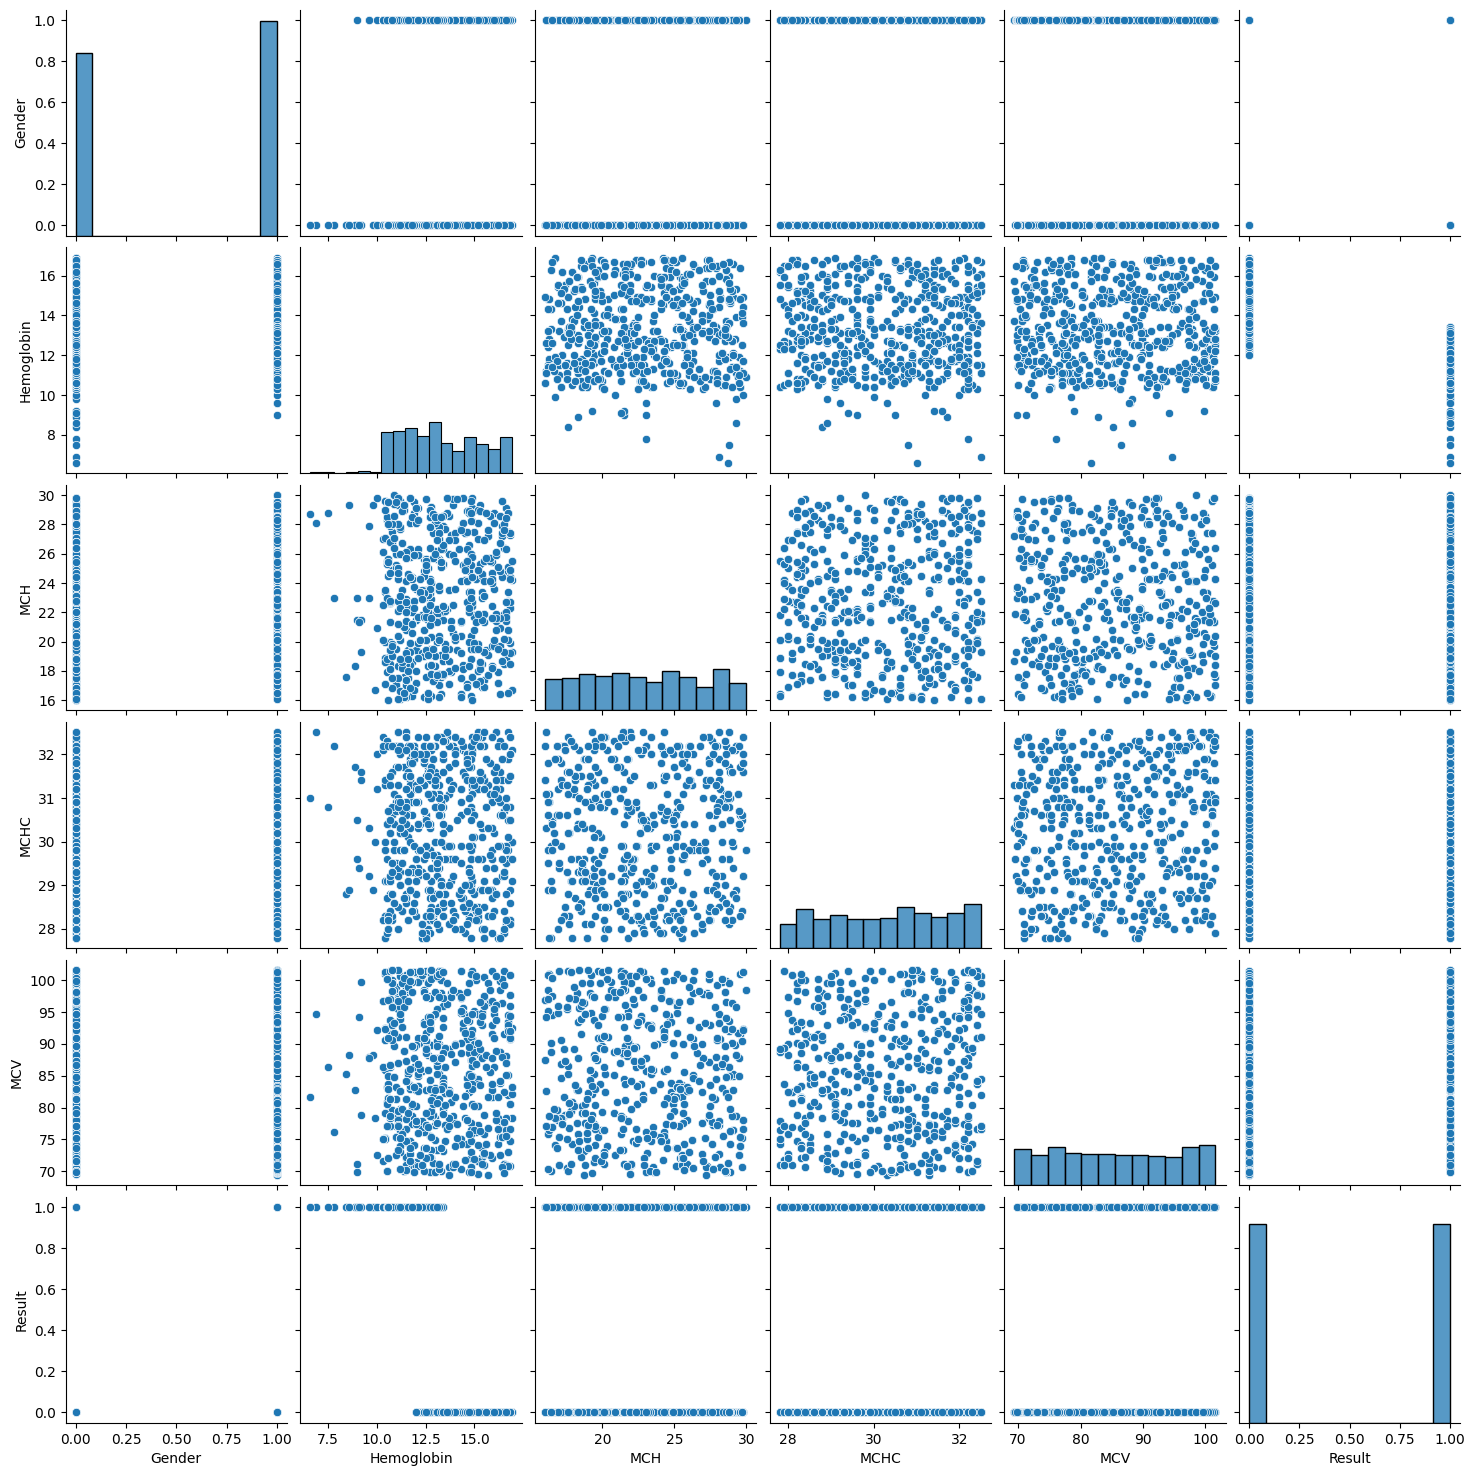

In [45]:
sns.pairplot(df)

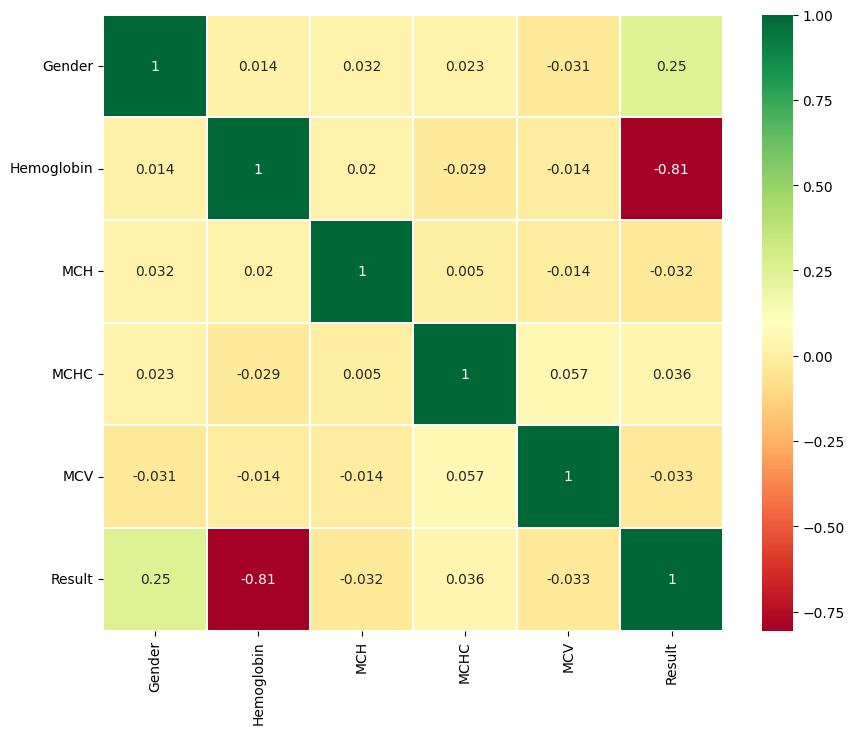

In [48]:
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn", linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [49]:
# splitting data into train and test

In [50]:
x=df.drop('Result',axis=1)
x


,Gender,Hemoglobin,MCH,MCHC,MCV
1234,1,16.6,18.8,28.1,70.9
1188,0,15.3,18.3,30.4,93.4
106,0,14.8,20.4,28.5,91.1
954,0,14.6,16.9,31.9,78.1
112,0,15.9,28.7,31.0,81.6
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [51]:
y=df['Result']
y

,Result
1234,0
1188,0
106,0
954,0
112,0
...,...
1415,1
1416,1
1417,1
1418,1


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


In [54]:
# model building


logistic regression model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred=logistic_regression.predict(x_test)
acc_lr = accuracy_score(y_test,y_pred)
c_lr=classification_report(y_test,y_pred)
print('Accuracy Score: ',acc_lr)
print(c_lr)

Accuracy Score:  0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.99      1.00      0.99       135

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



random forest model

In [59]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred)
c_rf = classification_report(y_test,y_pred)
print('Accuracy Score: ',acc_rf)
print(c_rf)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



decision tree classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred)
c_dt = classification_report(y_test,y_pred)
print('Accuracy Score: ',acc_dt)
print(c_dt)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



Gaussian navies byes

In [61]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
acc_nb = accuracy_score(y_test,y_pred)
c_nb = classification_report(y_test,y_pred)
print('Accuracy Score: ',acc_nb)
print(c_nb)

Accuracy Score:  0.9798387096774194
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.97      0.99      0.98       135

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



support vector machine

In [64]:
from sklearn.svm import SVC
support_vector = SVC()
support_vector.fit(x_train, y_train)
y_pred = support_vector.predict(x_test)
acc_svc = accuracy_score(y_test,y_pred)
c_svc = classification_report(y_test,y_pred)
print('Accuracy Score: ',acc_svc)
print(c_svc)

Accuracy Score:  0.9395161290322581
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       113
           1       0.91      0.99      0.95       135

    accuracy                           0.94       248
   macro avg       0.95      0.93      0.94       248
weighted avg       0.94      0.94      0.94       248



Gradient boosting classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred = GBC.predict(x_test)
acc_gbc = accuracy_score(y_test,y_pred)
c_gbc = classification_report(y_test,y_pred)
print('Accuracy Score: ',acc_gbc)
print(c_gbc)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



Testing the model

In [66]:
prediction = GBC.predict([[0,11.6,22.3,30.9,74.5]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [67]:
prediction [0]

np.int64(1)

In [69]:
if prediction[0] == 0:
   print("You don't have a Anemic Disease")
elif prediction [0] == 1:
   print("You have amemic disease")

You have amemic disease


Performance testing and Hyperparameter tunning

In [71]:
model = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'Support Vector Classifier', 'Gradient Boosting Classifier'],
                      'Score': [acc_lr, acc_dt, acc_rf, acc_nb, acc_svc, acc_gbc]
})
display(model)

,Model,Score
0,Logistic Regression,0.991935
1,Decision Tree Classifier,1.000000
2,Random Forest Classifier,1.000000
3,Gaussian Naive Bayes,0.979839
4,Support Vector Classifier,0.939516
5,Gradient Boosting Classifier,1.000000


For save the best Model

In [73]:
import pickle
import warnings
pickle.dump(GBC,open('model.pkl','wb'))